# importing

In [1]:
import pandas as pd
import numpy as np 
from numpy.random import randn
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPRegressor, MLPClassifierfrom 
import tkinter as tk
from tkinter import ttk, messagebox
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Data Exploration

In [2]:
#Reading the excel sheet
df = pd.read_excel('/Users/salmasamy/Downloads/Datasets/Adult Census Income_Dataset.xlsx')


In [3]:
#showing the first 5 rows
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [5]:
#dataset description 
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,32561.0,38.581647,13.640433,17.0,28.0,37.0,48.0,90.0
fnlwgt,32561.0,189778.366512,105549.977697,12285.0,117827.0,178356.0,237051.0,1484705.0
education.num,32561.0,10.080679,2.572720,1.0,9.0,10.0,12.0,16.0
capital.gain,32561.0,1077.648844,7385.292085,0.0,0.0,0.0,0.0,99999.0
capital.loss,32561.0,87.303830,402.960219,0.0,0.0,0.0,0.0,4356.0
hours.per.week,32561.0,40.437456,12.347429,1.0,40.0,40.0,45.0,99.0


In [6]:
df['income']=df['income'].map({"<=50K":0,">50K":1})

<Axes: xlabel='income', ylabel='count'>

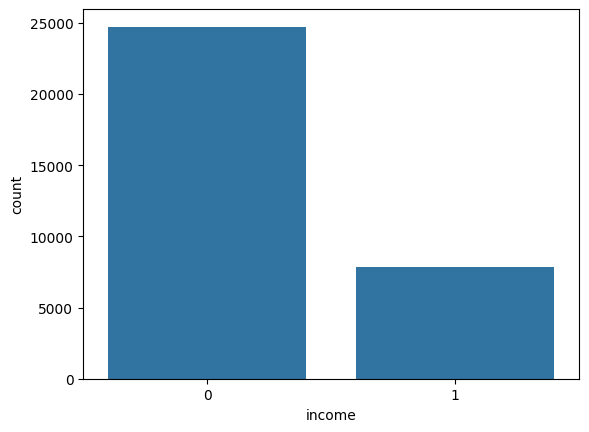

In [7]:
sns.countplot(x='income',data=df)

# Pre-Processing

### Remove Duplicate Data

In [ ]:
#identify and remove duplicates
#identify duplicates 
duplicates = df.duplicated().sum()
print(f'There are {duplicates} duplicated rows')

#remove duplicates
df_no_duplicates = df.drop_duplicates()

In [ ]:
#checking for duplicates after removal
print({df_no_duplicates.duplicated().sum()})

### Filling Missing Values 

In [ ]:
# Replace '?' with NaN (Not a Number) -> missing value 
df.replace('?', np.nan, inplace=True) 

# Replacing nan values with the mode (categorical columns)
df['occupation'] = df['occupation'].fillna(df['occupation'].mode()[0])
df['workclass'] = df['workclass'].fillna(df['workclass'].mode()[0])
df['native.country'] = df['native.country'].fillna(df['native.country'].mode()[0])

df.head()

In [ ]:
#Checking minimum number of non-null entries to remove the whole column in train dataset
perc = 30.0
min_count =  int(((100-perc)/100)*df.shape[0] + 1)
print(min_count)

### Finding Missing Values 

In [ ]:
#Cheking sum of null entries in train dataset
df.isnull().sum()


### Data Reduction

In [10]:
#identifying all unique values in the marital status
print('marital.status',df['marital.status'].unique())

marital.status ['Widowed' 'Divorced' 'Separated' 'Never-married' 'Married-civ-spouse'
 'Married-spouse-absent' 'Married-AF-spouse']


In [11]:
df['marital.status'].replace(["Never-married"], "NotMarried",inplace=True)
df['marital.status'].replace(["Married-AF-spouse"], "Married",inplace=True)
df['marital.status'].replace(["Married-civ-spouse"], "Married",inplace=True)
df['marital.status'].replace(["Married-spouse-absent"], "NotMarried",inplace=True)
df['marital.status'].replace(["Separated"], "Separated",inplace=True)
df['marital.status'].replace(["Divorced"], "Separated",inplace=True)
df['marital.status'].replace(["Widowed"], "Widowed",inplace=True)

In [12]:
print('marital.status',df['marital.status'].unique())

marital.status ['Widowed' 'Separated' 'NotMarried' 'Married']


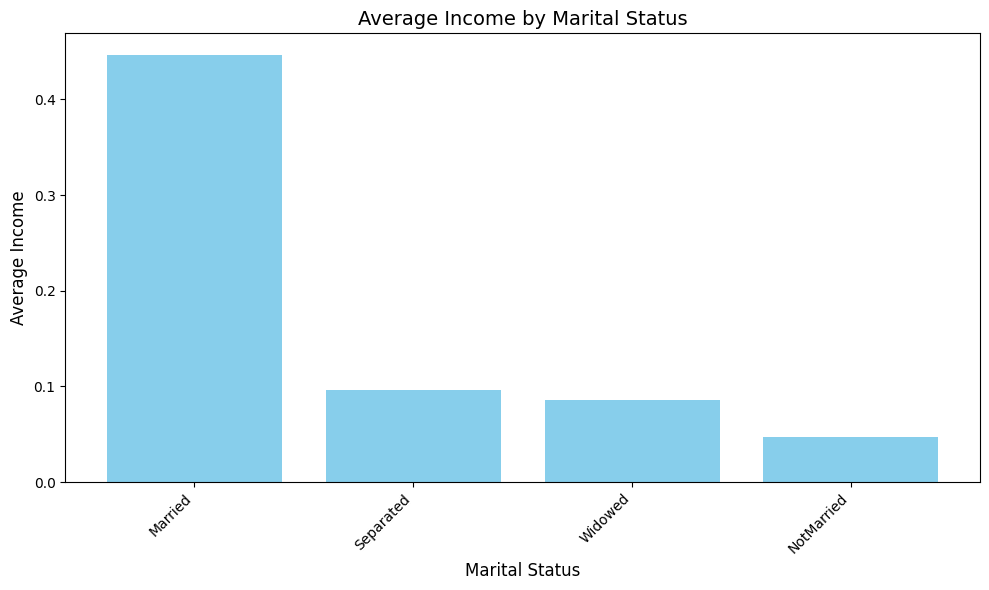

In [13]:
# Group data by marital status and calculate the mean income
result = df[['marital.status', 'income']].groupby(['marital.status'], as_index=False).mean().sort_values(by='income', ascending=False)

# Visualization
plt.figure(figsize=(10, 6))
plt.bar(result['marital.status'], result['income'], color='skyblue')
plt.xlabel('Marital Status', fontsize=12)
plt.ylabel('Average Income', fontsize=12)
plt.title('Average Income by Marital Status', fontsize=14)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.tight_layout()
plt.show()

In [14]:
print('education',df['education'].unique())

education ['HS-grad' 'Some-college' '7th-8th' '10th' 'Doctorate' 'Prof-school'
 'Bachelors' 'Masters' '11th' 'Assoc-acdm' 'Assoc-voc' '1st-4th' '5th-6th'
 '12th' '9th' 'Preschool']


In [15]:
df['education'].replace('Preschool', 'dropout',inplace=True)
df['education'].replace('10th', 'dropout',inplace=True)
df['education'].replace('11th', 'dropout',inplace=True)
df['education'].replace('12th', 'dropout',inplace=True)
df['education'].replace('1st-4th', 'dropout',inplace=True)
df['education'].replace('5th-6th', 'dropout',inplace=True)
df['education'].replace('7th-8th', 'dropout',inplace=True)
df['education'].replace('9th', 'dropout',inplace=True)
df['education'].replace('HS-Grad', 'HighGrad',inplace=True)
df['education'].replace('HS-grad', 'HighGrad',inplace=True)
df['education'].replace('Some-college', 'CommunityCollege',inplace=True)
df['education'].replace('Assoc-acdm', 'CommunityCollege',inplace=True)
df['education'].replace('Assoc-voc', 'CommunityCollege',inplace=True)
df['education'].replace('Bachelors', 'Bachelors',inplace=True)
df['education'].replace('Masters', 'Masters',inplace=True)
df['education'].replace('Prof-school', 'Masters',inplace=True)
df['education'].replace('Doctorate', 'Doctorate',inplace=True)

In [16]:
print('education',df['education'].unique())

education ['HighGrad' 'CommunityCollege' 'dropout' 'Doctorate' 'Masters' 'Bachelors']


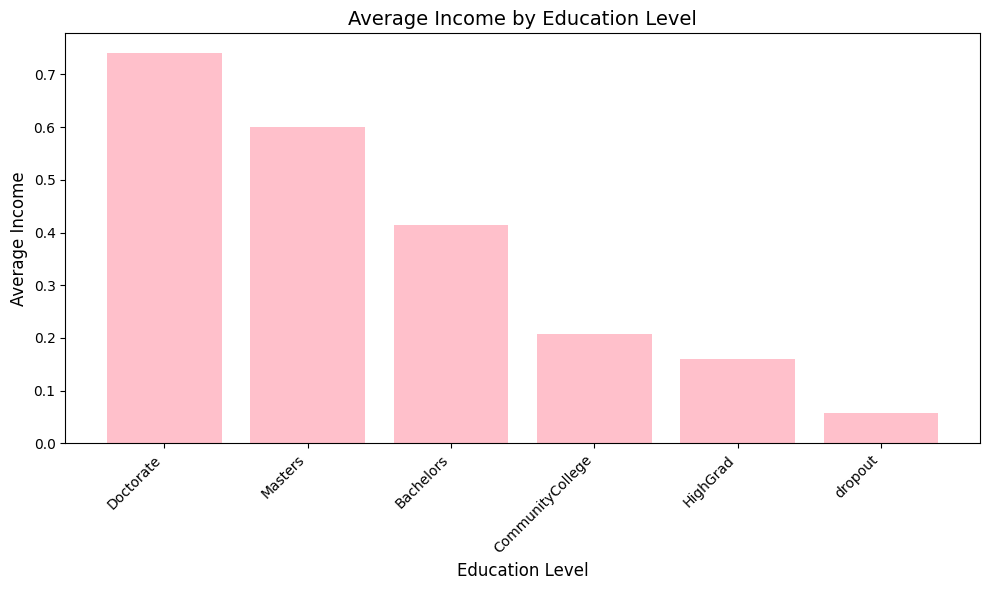

In [21]:
result = df[['education', 'income']].groupby(['education'], as_index=False).mean().sort_values(by='income', ascending=False)

# Visualization
plt.figure(figsize=(10, 6))
plt.bar(result['education'], result['income'], color='pink')
plt.xlabel('Education Level', fontsize=12)
plt.ylabel('Average Income', fontsize=12)
plt.title('Average Income by Education Level', fontsize=14)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.tight_layout()
plt.show()

In [18]:
result = df[['education', 'education.num']].groupby(['education'], as_index=False).mean().sort_values(by='education.num', ascending=False)

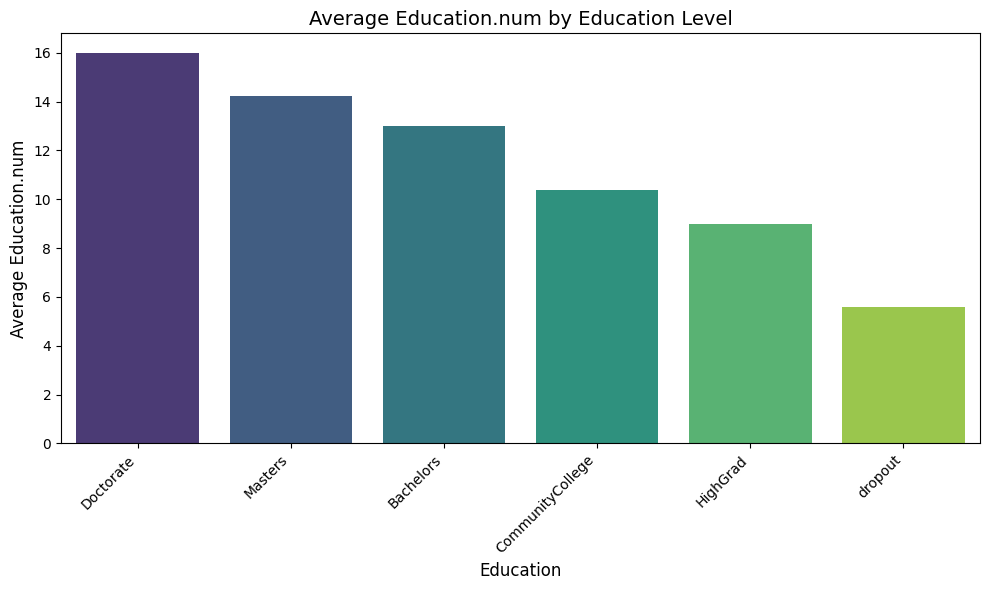

In [19]:
# Visualization
plt.figure(figsize=(10, 6))
sns.barplot(x='education', y='education.num', data=result, palette='viridis')
plt.xlabel('Education', fontsize=12)
plt.ylabel('Average Education.num', fontsize=12)
plt.title('Average Education.num by Education Level', fontsize=14)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

## Data Transformation

### Encoding

In [ ]:
#Encode columns with object datatypes
label_encoder = preprocessing.LabelEncoder()

for i in df.columns:
    if (df[i].dtypes== 'object') :
        df[i] = label_encoder.fit_transform(df[i])
        
      

In [ ]:
df.head()

In [ ]:
#Correlation using heatmap
plt.figure(figsize = (30, 25))
sns.heatmap(df.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [ ]:
# Slicing the data into features (X) and target (Y)
# Define features and target
X = df.drop('income', axis=1)
y = df['income'] # Labels

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

### Data Scaling 

In [ ]:
# Scaling the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
df.head()

# Evaluation

In [ ]:
def evaluate_model(model, X_test, y_test):
    # Make predictions
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None
    
    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)*100
    precision = precision_score(y_test, y_pred)*100
    recall = recall_score(y_test, y_pred)*100
    f1 = f1_score(y_test, y_pred)*100
    roc_auc = roc_auc_score(y_test, y_pred_proba) if y_pred_proba is not None else None
    
    # Print evaluation metrics
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1-Score: {f1}")
    if roc_auc is not None:
        print(f"ROC-AUC: {roc_auc}")
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['<=50K', '>50K'], yticklabels=['<=50K', '>50K'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()
    
    # ROC Curve
    if roc_auc is not None:
        fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
        plt.figure(figsize=(8, 6))
        plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
        plt.plot([0, 1], [0, 1], 'k--')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('ROC Curve')
        plt.legend(loc='lower right')
        plt.show()

# Decision Tree Classifier

In [ ]:
# Defining the parameter grid for Decision Tree
param_grid_dt = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize model
dt = DecisionTreeClassifier()

# Grid search with cross-validation
grid_search_dt = GridSearchCV(estimator=dt, param_grid=param_grid_dt, cv=5, n_jobs=-1, verbose=2)
grid_search_dt.fit(X_train, y_train)

# Train model and get best parameters
best_params_dt = grid_search_dt.best_params_
best_dt = DecisionTreeClassifier(**best_params_dt)
best_dt.fit(X_train, y_train)

# Making predictions
y_pred_dt = best_dt.predict(X_test)

# Evaluate the model
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"Decision Tree model accuracy: {accuracy_dt}")
print(f"Best hyperparameters for Decision Tree: {best_params_dt}")

In [ ]:
best_params_dt = {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2}

# Train the final Decision Tree model with the best hyperparameters
final_dt = DecisionTreeClassifier(**best_params_dt)
final_dt.fit(X_train, y_train)

# Make predictions with the final model
y_pred_dt = final_dt.predict(X_test)

# Evaluate the final Decision Tree model
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"Final Decision Tree model accuracy: {accuracy_dt}")
print("Evaluating Decision Tree Model:")
evaluate_model(final_dt, X_test, y_test)

### MLP Classifier 

In [ ]:
#varying the maximum iterations and the learning rate of the model
mlp_clf = MLPClassifier(random_state=42,max_iter=1000, learning_rate_init=0.001, activation="relu",
hidden_layer_sizes = ((100,)))

#Training the model using the train sets
mlp_clf.fit(X_train,y_train)

#Predicting the target using the test sets
y_pred = mlp_clf.predict(X_test)

#Model validation
accuracy_score(y_test, y_pred)

# Logistic Regression

In [ ]:
# Define the parameter grid for hyperparameter tuning (to guide the learning process)
param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'max_iter': [100, 200, 300]
}

# Initialize the model
lr = LogisticRegression()

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=lr, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Get the best parameters and train the model
best_params = grid_search.best_params_
best_lr = LogisticRegression(**best_params)
best_lr.fit(X_train, y_train)

# Make predictions
y_pred = best_lr.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Model accuracy: {accuracy}")
print(f"Best hyperparameters: {best_params}")

In [ ]:
# Best hyperparameters for Logistic Regression (already found)
best_params_lr = {'C': 0.1, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}

# Train the final Logistic Regression model with the best hyperparameters
final_lr = LogisticRegression(**best_params_lr)
final_lr.fit(X_train, y_train)

# Evaluate the final Logistic Regression model
print("Evaluating Logistic Regression Model:")
evaluate_model(final_lr, X_test, y_test)

### KNN Classifier

In [ ]:
# Define the parameter grid for KNN
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}

# Initialize the KNN model
knn = KNeighborsClassifier()

# Perform grid search with cross-validation for KNN
grid_search_knn = GridSearchCV(estimator=knn, param_grid=param_grid_knn, cv=5, n_jobs=-1, verbose=2)
grid_search_knn.fit(X_train, y_train)

# Get the best parameters and train the KNN model
best_params_knn = grid_search_knn.best_params_
best_knn = KNeighborsClassifier(**best_params_knn)
best_knn.fit(X_train, y_train)

# Make predictions with the best KNN model
y_pred_knn = best_knn.predict(X_test)

# Evaluate the KNN model
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"KNN model accuracy: {accuracy_knn}")
print(f"Best hyperparameters for KNN: {best_params_knn}")

In [ ]:
# Best hyperparameters for KNN
best_params_knn = {'algorithm': 'auto', 'n_neighbors': 9, 'weights': 'uniform'}

# Train the final KNN model with the best hyperparameters
final_knn = KNeighborsClassifier(**best_params_knn)
final_knn.fit(X_train, y_train)

# Evaluate final model
print("Evaluating KNN Model:")
evaluate_model(final_knn, X_test, y_test)


### SVM Classifier

In [ ]:
# Define the parameter grid for SVM
param_grid_svm = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma': ['scale', 'auto']
}

# Initialize the SVM model
svm = SVC()

# Perform grid search with cross-validation 
grid_search_svm = GridSearchCV(estimator=svm, param_grid=param_grid_svm, cv=5, n_jobs=-1, verbose=2)
grid_search_svm.fit(X_train, y_train)

# Get the best parameters and train model
best_params_svm = grid_search_svm.best_params_
best_svm = SVC(**best_params_svm)
best_svm.fit(X_train, y_train)

# Make predictions
y_pred_svm = best_svm.predict(X_test)

# Evaluate model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"SVM model accuracy: {accuracy_svm}")
print(f"Best hyperparameters for SVM: {best_params_svm}")

In [ ]:
best_params_svm = {'C': 1, 'kernel': 'rbf', 'gamma': 'scale'}

# Train the final SVM model with the best hyperparameters
final_svm = SVC(**best_params_svm, probability=True)
final_svm.fit(X_train, y_train)

# Evaluate the final SVM model
print("Evaluating SVM Model:")
evaluate_model(final_svm, X_test, y_test)

In [ ]:
X_train.head()

In [ ]:
df.head()

In [ ]:
# Define the feature names including 'education'
feature_names = ['age', 'workclass', 'fnlwgt', 'education', 'education.num', 'marital.status', 'occupation', 
                 'relationship', 'race', 'sex', 'capital.gain', 'capital.loss', 'hours.per.week', 
                 'native.country']

# Sample training data for fitting the scaler and classifiers (replace with actual training data)
X_train = pd.DataFrame(np.random.rand(100, len(feature_names)), columns=feature_names)
y_train = np.random.randint(2, size=100)  # Sample binary target variable

# Fit the scaler on the training data
scaler = StandardScaler()
scaler.fit(X_train)

# Fit the classifiers on the training data
final_knn = KNeighborsClassifier(n_neighbors=9, weights='uniform', algorithm='auto')
final_knn.fit(X_train, y_train)

final_dt = DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=4, min_samples_split=2)
final_dt.fit(X_train, y_train)

final_lr = LogisticRegression(C=0.1, max_iter=100, penalty='l1', solver='liblinear')
final_lr.fit(X_train, y_train)

final_svm = SVC(C=10, kernel='rbf', gamma='scale', probability=True)
final_svm.fit(X_train, y_train)

# Sample label encoders (replace with actual encoders trained on your data)
workclass_encoder = LabelEncoder().fit(['Private', 'Self-emp-not-inc', 'Self-emp-inc', 'Federal-gov', 'Local-gov', 'State-gov', 'Without-pay', 'Never-worked'])
education_encoder = LabelEncoder().fit(['dropout', 'HighGrad', 'CommunityCollege', 'Bachelors', 'Masters', 'Doctorate'])
marital_status_encoder = LabelEncoder().fit(['NotMarried', 'Married', 'Separated', 'Widowed'])
occupation_encoder = LabelEncoder().fit(['Tech-support', 'Craft-repair', 'Other-service', 'Sales', 'Exec-managerial', 'Prof-specialty', 'Handlers-cleaners', 'Machine-op-inspct', 'Adm-clerical', 'Farming-fishing', 'Transport-moving', 'Priv-house-serv', 'Protective-serv', 'Armed-Forces'])
relationship_encoder = LabelEncoder().fit(['Wife', 'Own-child', 'Husband', 'Not-in-family', 'Other-relative', 'Unmarried'])
race_encoder = LabelEncoder().fit(['White', 'Asian-Pac-Islander', 'Amer-Indian-Eskimo', 'Other', 'Black'])
sex_encoder = LabelEncoder().fit(['Female', 'Male'])
native_country_encoder = LabelEncoder().fit(['United-States'])

# Function to predict income category
def predict_income(age, workclass, fnlwgt, education, education_num, marital_status, occupation,
                   relationship, race, sex, capital_gain, capital_loss, hours_per_week, native_country,
                   model_name):
    try:
        # Transform categorical inputs using label encoders
        workclass = workclass_encoder.transform([workclass])[0]
        education = education_encoder.transform([education])[0]
        marital_status = marital_status_encoder.transform([marital_status])[0]
        occupation = occupation_encoder.transform([occupation])[0]
        relationship = relationship_encoder.transform([relationship])[0]
        race = race_encoder.transform([race])[0]
        sex = sex_encoder.transform([sex])[0]
        native_country = native_country_encoder.transform([native_country])[0]

        # Create the sample input array
        sample_input = np.array([
            age, workclass, fnlwgt, education, education_num, marital_status, occupation,
            relationship, race, sex, capital_gain, capital_loss, hours_per_week, native_country
        ]).reshape(1, -1)

        # Convert the sample input to a DataFrame
        sample_input_df = pd.DataFrame(sample_input, columns=feature_names)

        # Scale the sample input
        sample_input_scaled = pd.DataFrame(scaler.transform(sample_input_df), columns=feature_names)

        # Get selected model
        if model_name == "KNN":
            model = final_knn
        elif model_name == "Decision Tree":
            model = final_dt
        elif model_name == "Logistic Regression":
            model = final_lr
        elif model_name == "SVM":
             model = final_svm
        else:
            raise ValueError("Invalid model name")

        # Make a prediction
        sample_prediction = model.predict(sample_input_scaled)

        # Convert the prediction to the corresponding label
        predicted_label = '>50K' if sample_prediction[0] == 1 else '<=50K'

        return predicted_label

    except ValueError as e:
        return str(e)

# Test cases to check if the function is working correctly
test_cases = [
    (25, "Private", 200000, "Bachelors", 13, "NotMarried", "Sales", "Not-in-family", "White", "Male", 0, 0, 40, "United-States", "KNN"),
    (45, "Self-emp-not-inc", 300000, "Masters", 14, "Married", "Exec-managerial", "Husband", "Asian-Pac-Islander", "Female", 5000, 0, 50, "United-States", "Decision Tree"),
    (35, "Federal-gov", 150000, "Doctorate", 16, "Separated", "Prof-specialty", "Unmarried", "Black", "Male", 0, 2000, 60, "United-States", "Logistic Regression"),
    (28, "Local-gov", 100000, "HighGrad", 9, "Widowed", "Tech-support", "Wife", "Amer-Indian-Eskimo", "Female", 10000, 5000, 30, "United-States", "SVM")
]

# Run test cases and print results
for i, test_case in enumerate(test_cases):
    result = predict_income(*test_case)
    print(f"Test Case {i+1}: Predicted Income Category: {result}")


# GUI

In [ ]:
# Define the feature names including 'education'
feature_names = ['age', 'workclass', 'fnlwgt', 'education', 'education.num', 'marital.status', 'occupation', 
                 'relationship', 'race', 'sex', 'capital.gain', 'capital.loss', 'hours.per.week', 
                 'native.country']

# Sample training data for fitting the scaler and classifiers (replace with actual training data)
X_train = pd.DataFrame(np.random.rand(100, len(feature_names)), columns=feature_names)
y_train = np.random.randint(2, size=100)  # Sample binary target variable

# Fit the scaler on the training data
scaler = StandardScaler()
scaler.fit(X_train)

# Fit the classifiers on the training data
final_knn = KNeighborsClassifier(n_neighbors=9, weights='uniform', algorithm='auto')
final_knn.fit(X_train, y_train)

final_dt = DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=4, min_samples_split=2)
final_dt.fit(X_train, y_train)

final_lr = LogisticRegression(C=0.1, max_iter=100, penalty='l1', solver='liblinear')
final_lr.fit(X_train, y_train)

final_svm = SVC(C=10, kernel='rbf', gamma='scale', probability=True)
final_svm.fit(X_train, y_train)

# Sample label encoders (replace with actual encoders trained on your data)
workclass_encoder = LabelEncoder().fit(['Private', 'Self-emp-not-inc', 'Self-emp-inc', 'Federal-gov', 'Local-gov', 'State-gov', 'Without-pay', 'Never-worked'])
education_encoder = LabelEncoder().fit(['dropout', 'HighGrad', 'CommunityCollege', 'Bachelors', 'Masters', 'Doctorate'])
marital_status_encoder = LabelEncoder().fit(['NotMarried', 'Married', 'Separated', 'Widowed'])
occupation_encoder = LabelEncoder().fit(['Tech-support', 'Craft-repair', 'Other-service', 'Sales', 'Exec-managerial', 'Prof-specialty', 'Handlers-cleaners', 'Machine-op-inspct', 'Adm-clerical', 'Farming-fishing', 'Transport-moving', 'Priv-house-serv', 'Protective-serv', 'Armed-Forces'])
relationship_encoder = LabelEncoder().fit(['Wife', 'Own-child', 'Husband', 'Not-in-family', 'Other-relative', 'Unmarried'])
race_encoder = LabelEncoder().fit(['White', 'Asian-Pac-Islander', 'Amer-Indian-Eskimo', 'Other', 'Black'])
sex_encoder = LabelEncoder().fit(['Female', 'Male'])
native_country_encoder = LabelEncoder().fit(['United-States'])

# Function to predict income category
def predict_income():
    try:
        # Get user inputs
        age = int(entry_age.get())
        workclass = workclass_encoder.transform([entry_workclass.get()])[0]
        fnlwgt = int(entry_fnlwgt.get())
        education = education_encoder.transform([entry_education.get()])[0]
        education_num = int(entry_education_num.get())
        marital_status = marital_status_encoder.transform([entry_marital_status.get()])[0]
        occupation = occupation_encoder.transform([entry_occupation.get()])[0]
        relationship = relationship_encoder.transform([entry_relationship.get()])[0]
        race = race_encoder.transform([entry_race.get()])[0]
        sex = sex_encoder.transform([entry_sex.get()])[0]
        capital_gain = int(entry_capital_gain.get())
        capital_loss = int(entry_capital_loss.get())
        hours_per_week = int(entry_hours_per_week.get())
        native_country = native_country_encoder.transform([entry_native_country.get()])[0]

        # Create the sample input array
        sample_input = np.array([
            age, workclass, fnlwgt, education, education_num, marital_status, occupation,
            relationship, race, sex, capital_gain, capital_loss, hours_per_week, native_country
        ]).reshape(1, -1)

        # Convert the sample input to a DataFrame
        sample_input_df = pd.DataFrame(sample_input, columns=feature_names)

        # Scale the sample input
        sample_input_scaled = pd.DataFrame(scaler.transform(sample_input_df), columns=feature_names)

        # Get selected model
        selected_model_name = model_combobox.get()
        
        if selected_model_name == "KNN":
            model = final_knn
        elif selected_model_name == "Decision Tree":
            model = final_dt
        elif selected_model_name == "Logistic Regression":
            model = final_lr
        elif selected_model_name == "SVM":
            model = final_svm
        else:
            messagebox.showerror("Model Selection Error", "Please select a valid model.")
            return

        # Make a prediction
        sample_prediction = model.predict(sample_input_scaled)

        # Convert the prediction to the corresponding label
        predicted_label = '>50K' if sample_prediction[0] == 1 else '<=50K'

        # Display the prediction result
        messagebox.showinfo("Prediction Result", f"The predicted income category is: {predicted_label}")

    except ValueError:
        messagebox.showerror("Input Error", "Please enter valid values for all fields.")

# Create the GUI window
window = tk.Tk()
window.title("Income Prediction")

# Create and place labels and entry widgets for user inputs
labels_texts = [
    "Age", "Workclass", "Fnlwgt", "Education", "Education Num",
    "Marital Status", "Occupation", "Relationship",
    "Race", "Sex", "Capital Gain", "Capital Loss",
    "Hours Per Week", "Native Country"
]

entries_vars = []
for i, text in enumerate(labels_texts):
    label = tk.Label(window, text=text)
    label.grid(row=i, column=0)
    entry_var = tk.StringVar()
    entry = tk.Entry(window, textvariable=entry_var)
    entry.grid(row=i, column=1)
    entries_vars.append(entry_var)

entry_age, entry_workclass, entry_fnlwgt, entry_education, entry_education_num, \
entry_marital_status, entry_occupation, entry_relationship, entry_race, \
entry_sex, entry_capital_gain, entry_capital_loss, entry_hours_per_week, \
entry_native_country = entries_vars

# Create and place the model selection combobox
model_label = tk.Label(window, text="Select Model")
model_label.grid(row=len(labels_texts), column=0)
model_combobox = ttk.Combobox(window, values=["KNN", "Decision Tree", "Logistic Regression", "SVM"])
model_combobox.grid(row=len(labels_texts), column=1)

# Create and place the Predict button
predict_button = tk.Button(window, text="Predict", command=predict_income)
predict_button.grid(row=len(labels_texts) + 1, columnspan=2)

# Run the GUI event loop
window.mainloop()